In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


## EDA

In [5]:
train["Response"].value_counts()

Response
0    10089739
1     1415059
Name: count, dtype: int64

In [6]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Note: 
+ no null
+ label: Response 
+ id: no use
+ Gender: binary 
+ Age: -> change to category
+ Driving_License: binary  
+ Region_Code: change to category
+ previous_insured: binary 
+ Vehicle_Damage: binary
+ Vehicle_Damage: category
+ Annual_Premium: numerical 
+ Policy_Sales_Channel: -> change to category
+ vintage: -> change to category

Important: 
+ this is imbalance dataset

### Binary cols

In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [8]:
group_res = train.groupby('Response')

In [9]:
train.groupby('Previously_Insured')["Response"].value_counts()

Previously_Insured  Response
0                   0           4766457
                    1           1411659
1                   0           5323282
                    1              3400
Name: count, dtype: int64

In [10]:
train.groupby('Gender')["Response"].value_counts()

Gender  Response
Female  0           4731603
        1            545061
Male    0           5358136
        1            869998
Name: count, dtype: int64

In [11]:
train.groupby('Driving_License')["Response"].value_counts()

Driving_License  Response
0                0              21502
                 1               1255
1                0           10068237
                 1            1413804
Name: count, dtype: int64

In [12]:
train.groupby('Vehicle_Age')["Response"].value_counts()

Vehicle_Age  Response
1-2 Year     0           4919406
             1           1063272
< 1 Year     0           4835296
             1            208849
> 2 Years    0            335037
             1            142938
Name: count, dtype: int64

In [13]:
train.groupby('Vehicle_Damage')["Response"].value_counts()

Vehicle_Damage  Response
No              0           5697548
                1             24021
Yes             0           4392191
                1           1391038
Name: count, dtype: int64

Note: 
+ people with no insure has higher chance to respond
+ Male has slightly higher rate of response
+ people without license is not likely to respond
+ the more people ride, the more they respond
+ people with vihicle damage arre likely to respond

### Numerical cols

Age, Region_Code, Annual_Premium, Policy_Sales_Channel, Vintage


In [14]:
def plot_all_cols(data,cols):
    id_res = (data["Response"] == 1)
    id_no_res = (data["Response"] == 0)
    l = len(cols)
    plt.figure(figsize=(20,5*l))
    for i,col in enumerate(cols):
        print(col)
        plt.subplot(l,2,i*2+1)
        value,count = np.unique(data[col].loc[id_res],return_counts=True)
        plt.bar(value,count)
        plt.subplot(l,2,i*2+2)
        value,count = np.unique(data[col].loc[id_no_res],return_counts=True)
        plt.bar(value,count,color='r')
    plt.tight_layout()
        

Age
Region_Code
Policy_Sales_Channel


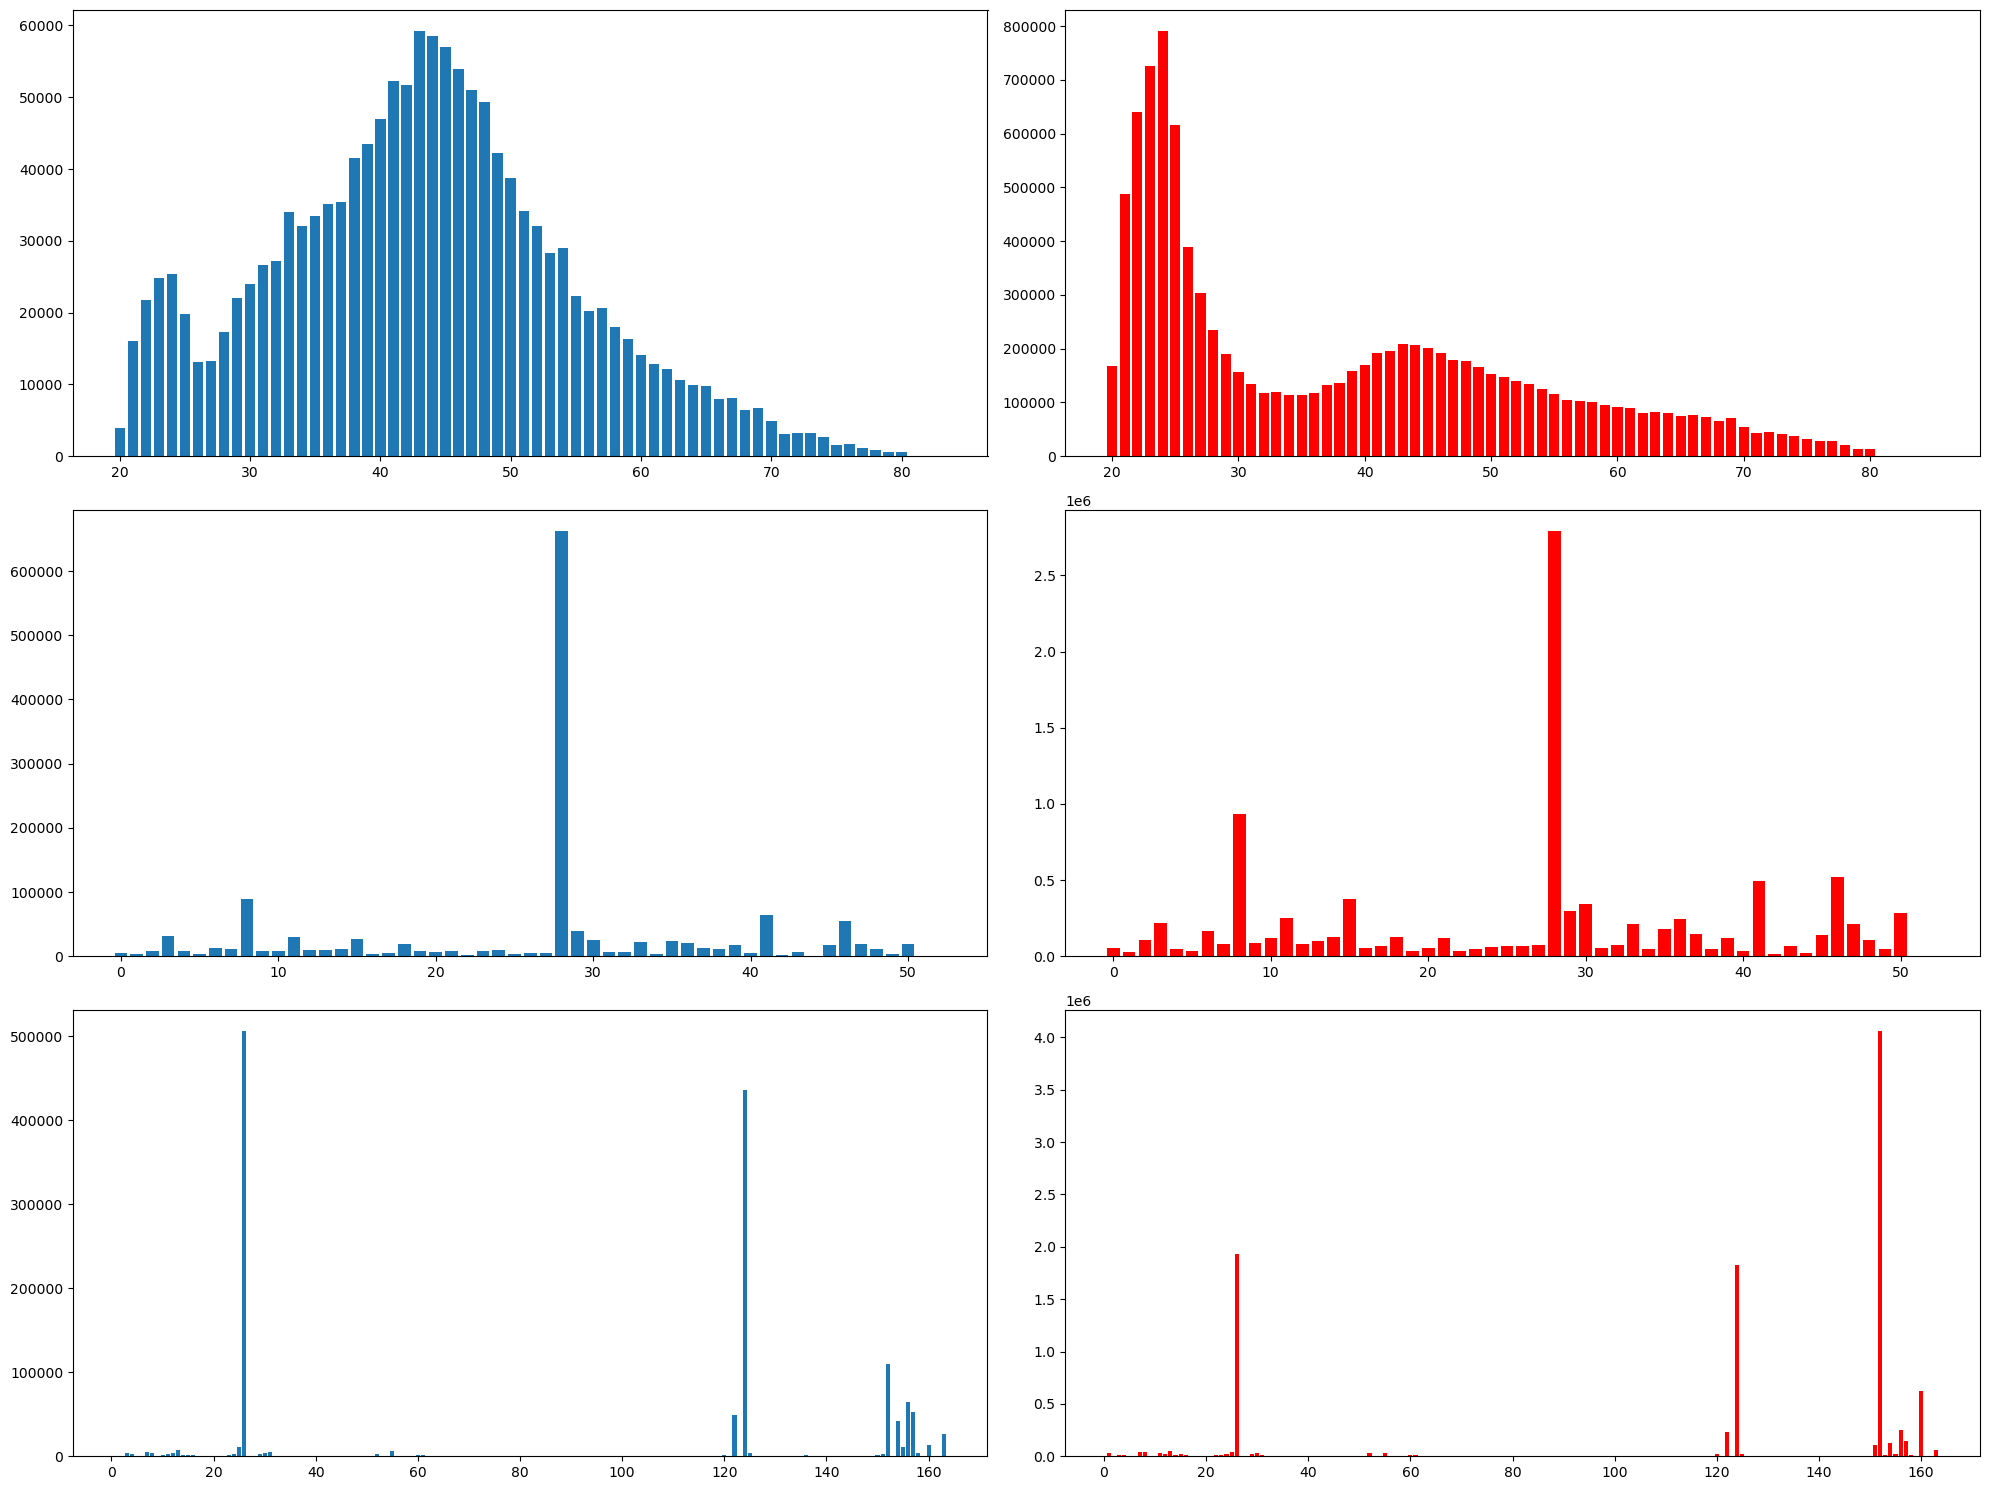

In [15]:
plot_all_cols(train,["Age","Region_Code","Policy_Sales_Channel"])

In [16]:
def cal_pct_diff(data,col):
    id_res = (data["Response"] == 1)
    id_no_res = (data["Response"] == 0)
    value_res,count_res = np.unique(data[col].loc[id_res],return_counts=True)
    value_no_res,count_no_res = np.unique(data[col].loc[id_no_res],return_counts=True)
    res = {}
    for i in range(len(value_res)):
        res[value_res[i]] = count_res[i]/count_no_res[i]
    return res

In [17]:
pct_res = (train["Response"] == 1).sum()/(train["Response"] == 0).sum()
pct_res

0.14024733444542023

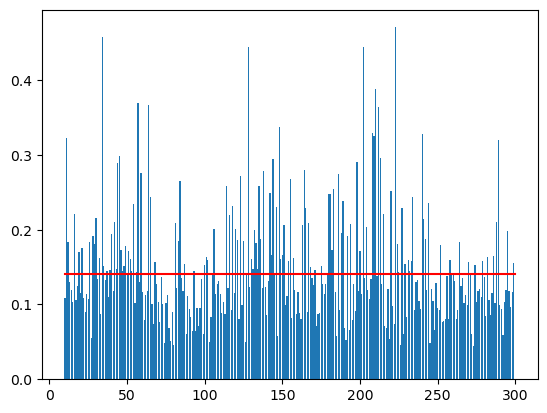

In [18]:
dict_pct = cal_pct_diff(train,"Vintage")
keys = np.array(list(dict_pct.keys()))
values = np.array(list(dict_pct.values()))
# plt.figure(figsize=(20,5))
plt.bar(keys,values)
plt.plot([10,300],[pct_res,pct_res],'r')

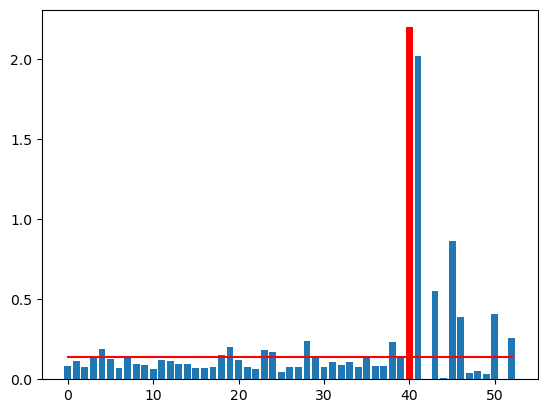

In [19]:
dict_pct = cal_pct_diff(train,"Region_Code")
keys = np.array(list(dict_pct.keys()))
values = np.array(list(dict_pct.values()))
idx = values < 4000
plt.bar(keys[idx],values[idx])
plt.bar(keys[~idx],2.2,color='r')
plt.plot([0,52],[pct_res,pct_res],'r')

In [20]:
val_c = train["Policy_Sales_Channel"].value_counts()
id_val = val_c[val_c.values > 5000]

In [21]:
channel_id = train["Policy_Sales_Channel"].apply(lambda x: True if x in id_val else False)

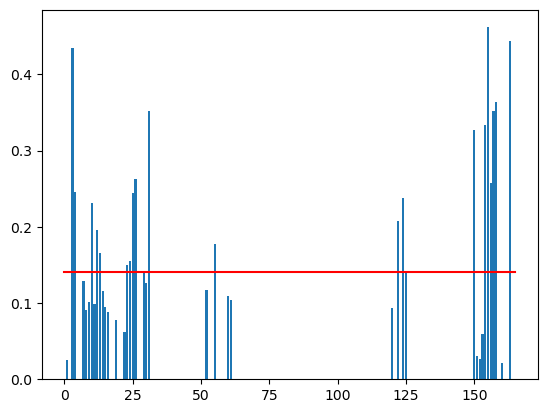

In [22]:
dict_pct = cal_pct_diff(train[train["Policy_Sales_Channel"].isin(id_val.index)],"Policy_Sales_Channel")
keys = np.array(list(dict_pct.keys()))
values = np.array(list(dict_pct.values()))
# idx = values < 2
plt.bar(keys,values)
# plt.bar(keys[~idx],2.2,color='r')
plt.plot([0,165],[pct_res,pct_res],'r')

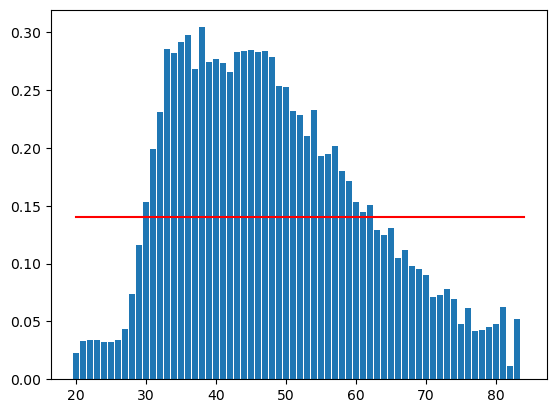

In [23]:
dict_pct = cal_pct_diff(train,"Age")
keys = np.array(list(dict_pct.keys()))
values = np.array(list(dict_pct.values()))
# plt.figure(figsize=(20,5))
plt.bar(keys,values)
plt.plot([20,84],[pct_res,pct_res],'r')

In [24]:
train["Annual_log"] = train["Annual_Premium"].apply(np.log1p)
train["Annual_log"]

0           11.083711
1           10.983800
2           10.546499
3            7.875119
4           10.371990
              ...    
11504793    10.218773
11504794    10.292484
11504795     7.875119
11504796    10.788164
11504797    10.399890
Name: Annual_log, Length: 11504798, dtype: float64

In [30]:
train["Annual_log"].describe()

count    1.150480e+07
mean     9.997924e+00
std      1.034031e+00
min      7.875119e+00
25%      1.013769e+01
50%      1.036801e+01
75%      1.058284e+01
max      1.319963e+01
Name: Annual_log, dtype: float64

In [25]:
# grouped_data = train.groupby("Response")["Annual_Premium"]

In [26]:
# sns.histplot(data=train, x='Annual_Premium', hue='Response', multiple="dodge",bins=80, kde=True)

In [27]:
# grouped_data.plot(kind='bar')

In [31]:
bins = [float('-inf'), 8.0, 8.5,9.0,9.5,10,10.5,11,11.5,12,12.5,13,float('inf')]
labels = ['-8','8-8.5','8.5-9','9-9.5','9.5-10','10-10.5','10.5-11','11-11.5','11.5-12','12-12.5','12.5-13','13+']
train.loc[:, "AnnualGroup"]= pd.cut(train["Annual_log"],bins=bins,labels=labels,right=True, include_lowest=True)

C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_17084\2719870989.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age= train.groupby(['AnnualGroup', 'Response']).size().unstack(fill_value=0)


<Axes: xlabel='AnnualGroup'>

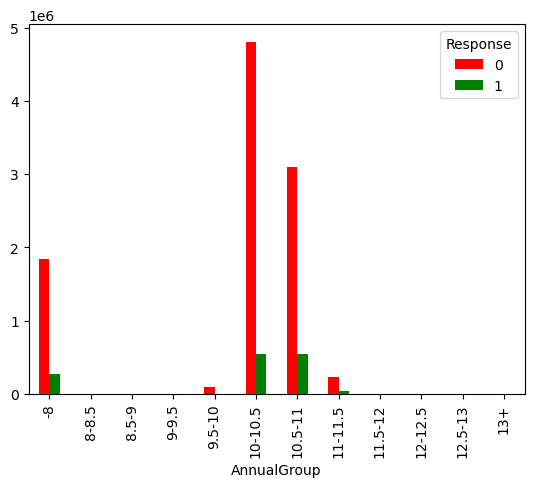

In [33]:
grouped_age= train.groupby(['AnnualGroup', 'Response']).size().unstack(fill_value=0)
grouped_age.plot(kind='bar', stacked=False, color=['red', 'green'])

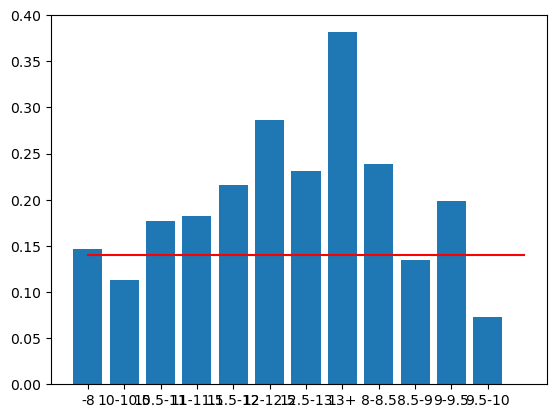

In [36]:
dict_pct = cal_pct_diff(train,"AnnualGroup")
keys = np.array(list(dict_pct.keys()))
values = np.array(list(dict_pct.values()))
# plt.figure(figsize=(20,5))
plt.bar(keys,values)
plt.plot([0,len(keys)-1],[pct_res,pct_res],'r')